In [45]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
chunks = {"time": 24}

original = xr.open_dataset("/scratch/e53/bxn599/aus10i/contig/ERA5/wbgt_AUS-10i_ERA5_evaluation_r1i1p1f1_CSIRO_CCAM-v2203-SN_v1-r1_1hr_198001010000-198012312300_contig.nc", chunks=chunks)
lon_shif = xr.open_dataset("/scratch/e53/bxn599/aus10i/ERA5_evaluation/wbgt_AUS-10i_ERA5_evaluation_r1i1p1f1_CSIRO_CCAM-v2203-SN_v1-r1_1hr_198001010000-198012312300_lon_shifted_000001.nc", chunks=chunks)
smal_neg = xr.open_dataset("/scratch/e53/bxn599/aus10i/ERA5_evaluation/wbgt_AUS-10i_ERA5_evaluation_r1i1p1f1_CSIRO_CCAM-v2203-SN_v1-r1_1hr_198001010000-198012312300_cza_set_small_neg.nc", chunks=chunks)

/g/data/xp65/public/apps/med_conda/envs/analysis3-25.10/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml


In [8]:
wbgt_original = original['wbgt']
wbgt_lon_shif = lon_shif['wbgt']
wbgt_smal_neg = smal_neg['wbgt']

wbgt_original = wbgt_original.assign_coords(lon=wbgt_original.lon.round(2))
wbgt_original = wbgt_original.assign_coords(lat=wbgt_original.lat.round(2))
wbgt_lon_shif = wbgt_lon_shif.assign_coords(lon=wbgt_original.lon.round(2))
wbgt_lon_shif = wbgt_lon_shif.assign_coords(lat=wbgt_original.lat.round(2))
wbgt_smal_neg = wbgt_smal_neg.assign_coords(lon=wbgt_original.lon.round(2))
wbgt_smal_neg = wbgt_smal_neg.assign_coords(lat=wbgt_original.lat.round(2))

In [9]:
print(wbgt_original)
print(wbgt_lon_shif)
print(wbgt_smal_neg)

<xarray.DataArray 'wbgt' (time: 8784, lat: 612, lon: 929)> Size: 20GB
dask.array<open_dataset-wbgt, shape=(8784, 612, 929), dtype=float32, chunksize=(24, 612, 929), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 70kB 1980-01-01 ... 1980-12-31T23:00:00
  * lat      (lat) float64 5kB -52.4 -52.3 -52.2 -52.1 -52.0 ... 8.4 8.5 8.6 8.7
  * lon      (lon) float64 7kB 89.2 89.3 89.4 89.5 ... 181.7 181.8 181.9 182.0
Attributes:
    long_name:  Wet Bulb Globe Temperature
    units:      degK
<xarray.DataArray 'wbgt' (time: 8784, lat: 612, lon: 929)> Size: 20GB
dask.array<open_dataset-wbgt, shape=(8784, 612, 929), dtype=float32, chunksize=(24, 612, 929), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 70kB 1980-01-01 ... 1980-12-31T23:00:00
  * lat      (lat) float64 5kB -52.4 -52.3 -52.2 -52.1 -52.0 ... 8.4 8.5 8.6 8.7
  * lon      (lon) float64 7kB 89.2 89.3 89.4 89.5 ... 181.7 181.8 181.9 182.0
Attributes:
    long_name:  Wet Bulb Globe Tempe

In [12]:
diff_lon_shif = wbgt_lon_shif - wbgt_original
diff_smal_neg = wbgt_smal_neg - wbgt_original
diff = wbgt_smal_neg - wbgt_lon_shif

## Difference at 20-NOV-1980 21:00, 129.9E, 15.3S
Lon shifted 0.00001 and CZDA changed to -1e-6 show the same difference

In [29]:
print(diff_lon_shif[7797,371,407].values)
print(diff_smal_neg[7797,371,407].values)

2.1047363
2.1047363


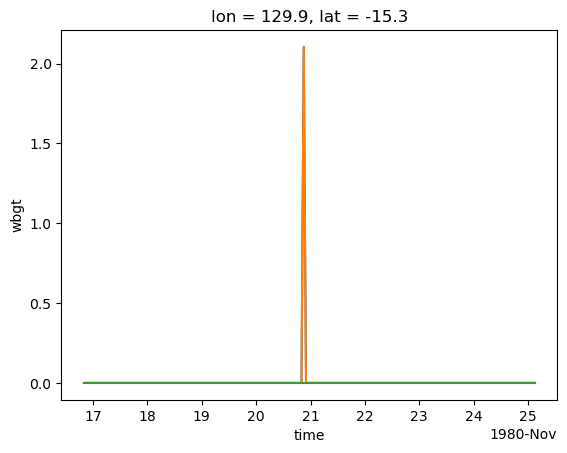

In [28]:
diff_lon_shif[7700:7900,371,407].plot()
diff_smal_neg[7700:7900,371,407].plot()
diff[7700:7900,371,407].plot()

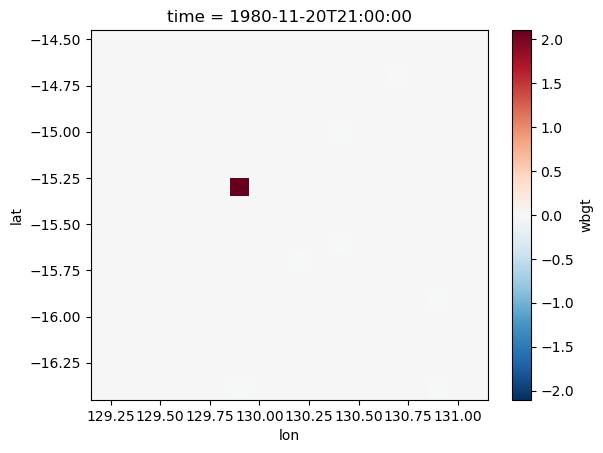

In [26]:
diff_lon_shif[7797,360:380,400:420].plot()

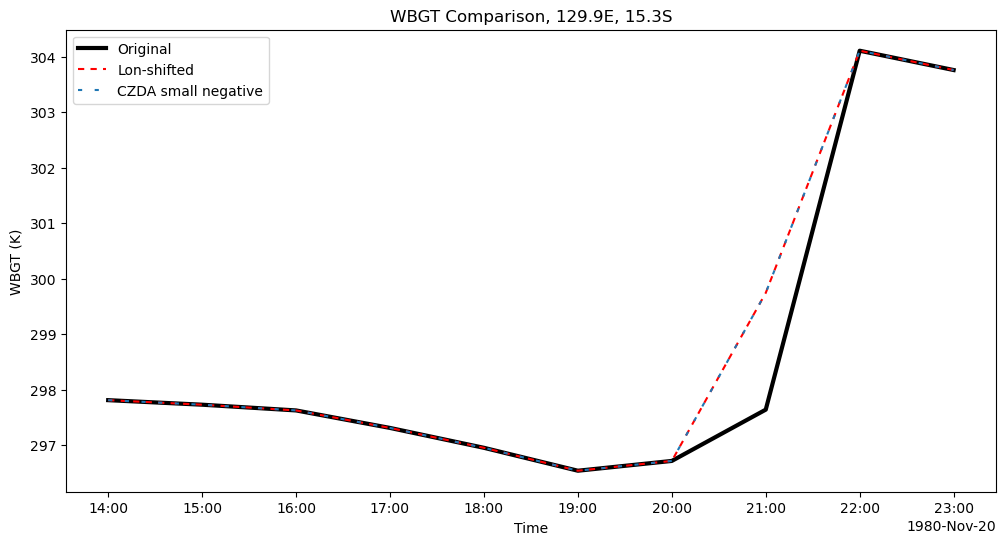

In [63]:
# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot original
wbgt_original[7790:7800, 371, 407].plot(
    label='Original',
    color="black",
    linewidth=3
)

# Plot lon-shifted on same axis
wbgt_lon_shif[7790:7800, 371, 407].plot(
    dashes=[3, 3],
    label='Lon-shifted',
    color="red"
)

# Plot small neg on same axis
wbgt_smal_neg[7790:7800, 371, 407].plot(
    dashes=[2, 6],
    label='CZDA small negative'
)
# Add legend
plt.legend()

# Add title and labels
plt.title('WBGT Comparison, 129.9E, 15.3S')
plt.xlabel('Time')
plt.ylabel('WBGT (K)')

plt.show()

## Compare lon shifted and czda small negative at 26-OCT-1980 20:00, 138.6E, 43.3S
Show that the datasets are not entirely the same

In [32]:
print(diff[7196,91,494].values)

-1.411499


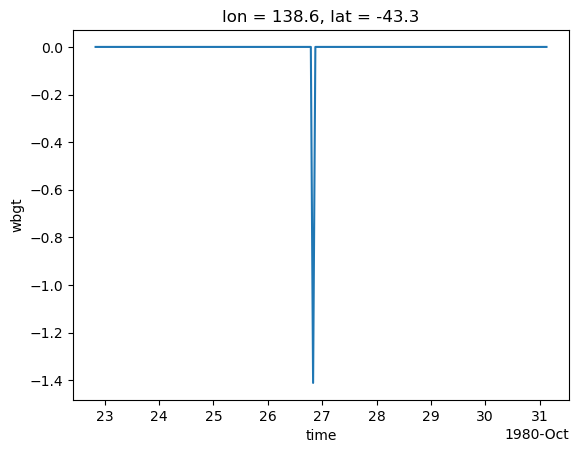

In [33]:
diff[7100:7300,91,494].plot()

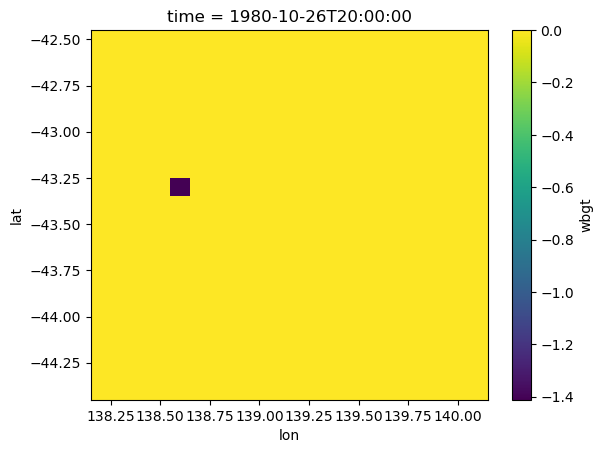

In [34]:
diff[7196,80:100,490:510].plot()

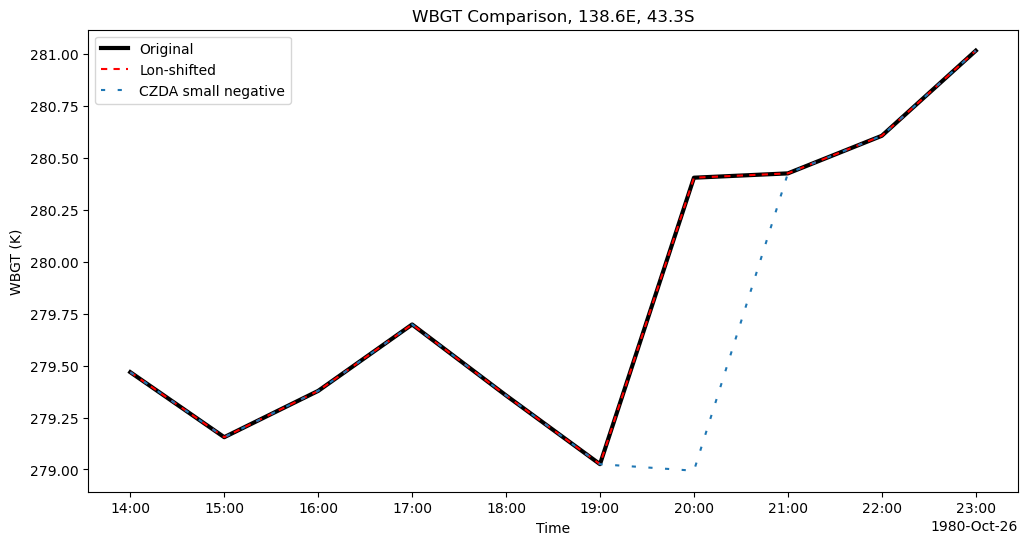

In [62]:
# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot original
wbgt_original[7190:7200, 91, 494].plot(
    label='Original',
    color="black",
    linewidth=3
)

# Plot lon-shifted on same axis
wbgt_lon_shif[7190:7200, 91, 494].plot(
    dashes=[3, 3],
    label='Lon-shifted',
    color="red"
)

# Plot small neg on same axis
wbgt_smal_neg[7190:7200, 91, 494].plot(
    dashes=[2, 6],
    label='CZDA small negative'
)
# Add legend
plt.legend()

# Add title and labels
plt.title('WBGT Comparison, 138.6E, 43.3S')
plt.xlabel('Time')
plt.ylabel('WBGT (K)')

plt.show()